In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_excel("./시도별 전출입 인구수.xlsx", header=0)

<AxesSubplot:>

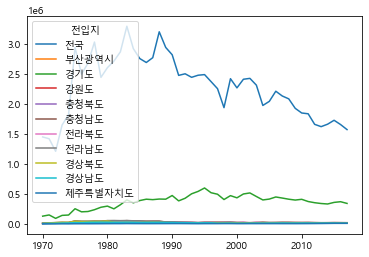

In [3]:
#데이터 전처리 작업
df = df.fillna(method='ffill')  # '전출지별'이 누락된 데이터를 앞 데이터로 채움 NaN 데이터 처리
df.head()

#서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask] # mask를 이용하여 True인 데이터만 추출
df_seoul = df_seoul.drop(['전출지별'], axis=1) # 전출지별 컬럼삭제
df_seoul.rename({'전입지별': '전입지'}, axis=1, inplace=True) # 전입지별 컬럼을 전입지로 변경
df_seoul.set_index('전입지', inplace=True)  # '전입지' 컮럼을 인덱스로 설정
#df_seoul
df_seoul.T.plot()

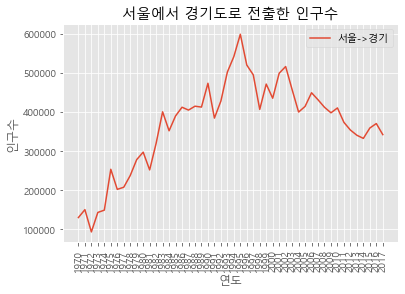

In [4]:
df_1 = df_seoul.loc['경기도']
plt.style.use('ggplot')

plt.plot(df_1.index, df_1.values)  # plt.plot(x축, y축)

plt.title("서울에서 경기도로 전출한 인구수")  # 제목
plt.xlabel("연도")  # x축 라벨
plt.ylabel("인구수") # y축 라벨
plt.xticks(rotation=90) # x라벨의 기울기 조절
plt.legend(labels=["서울->경기"], loc="upper right")

plt.show()

<AxesSubplot:>

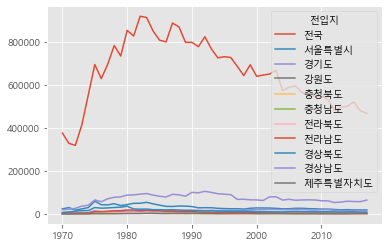

In [5]:
# 부산에서 다른지역으로 전출한 데이터만 추출해서 df_busan으로 저장
# 불필요한 컬럼 제거, 인데스는 '전입지별' ---.> '전입지'로 바꾸어서 인데스 설정

mask = (df['전출지별'] == '부산광역시') & (df['전입지별'] != '부산광역시')
df_busan = df[mask] # True or False 구별 True만 추출
df_busan = df_busan.drop(['전출지별'], axis=1)
df_busan.rename({'전입지별': '전입지'}, axis=1, inplace=True) # 전입지별 컬럼을 전입지로 변경
df_busan.set_index('전입지', inplace=True)  # '전입지' 컮럼을 인덱스로 설정
df_busan
df_busan.T.plot()

In [6]:
## %load "파일명.py" #해당 파일의 코딜내용을 본 프로그램으로 불러옴
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun gothic'
plt.rcParams['axes.unicode_minus'] = False

In [7]:
df = pd.read_excel("./시도별 전출입 인구수.xlsx", header=0)
df = df.fillna(method='ffill')
mask = (df['전출지별'] == '서울특별시') & ((df['전입지별'] == '경상북도') |\
        (df['전입지별'] == '충청남도') | (df['전입지별'] == '강원도'))

df_data = df[mask]

df_data.drop(['전출지별'], inplace=True, axis=1) # axis=1 열
df_data.rename({'전입지별':'전입지'}, axis=1, inplace=True) # rename 리스트 {} 불러옴
df_data.set_index('전입지', inplace=True)


C:\Users\82104\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\82104\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [8]:
df_t = df_data.T

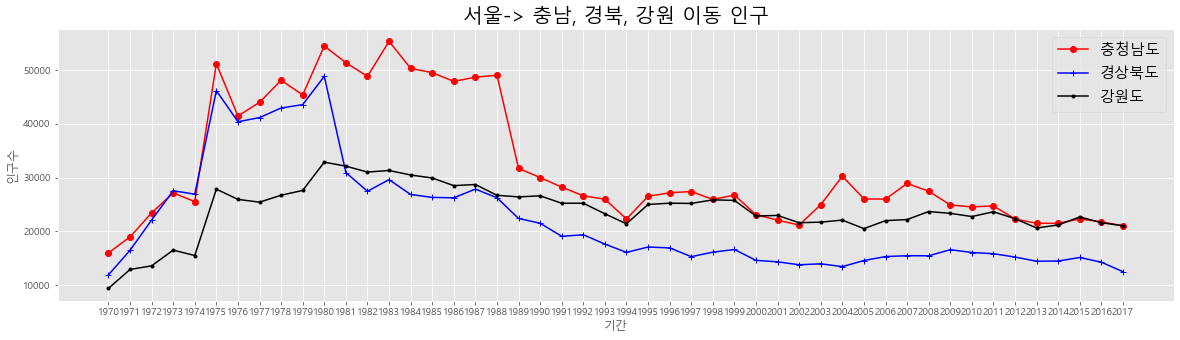

In [9]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1, 1, 1)

ax.plot(df_t.index, df_t["충청남도"], marker='o', color='red')
ax.plot(df_t.index, df_t["경상북도"], marker='+', color='b')
ax.plot(df_t.index, df_t["강원도"], marker='.', color='black')
ax.set_title("서울-> 충남, 경북, 강원 이동 인구", size=20)
ax.set_xlabel("기간")
ax.set_ylabel("인구수")
legend_labels = ["충청남도","경상북도","강원도"]
ax.legend(legend_labels,loc='best', fontsize=15)

plt.show()

In [10]:
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask] # mask를 이용하여 True인 데이터만 추출
df_seoul = df_seoul.drop(['전출지별'], axis=1) # 전출지별 컬럼삭제
df_seoul.rename({'전입지별': '전입지'}, axis=1, inplace=True) # 전입지별 컬럼을 전입지로 변경
df_seoul.set_index('전입지', inplace=True)
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도','강원도'], col_years]
plt. style.use('ggplot')

KeyError: '전라남도'

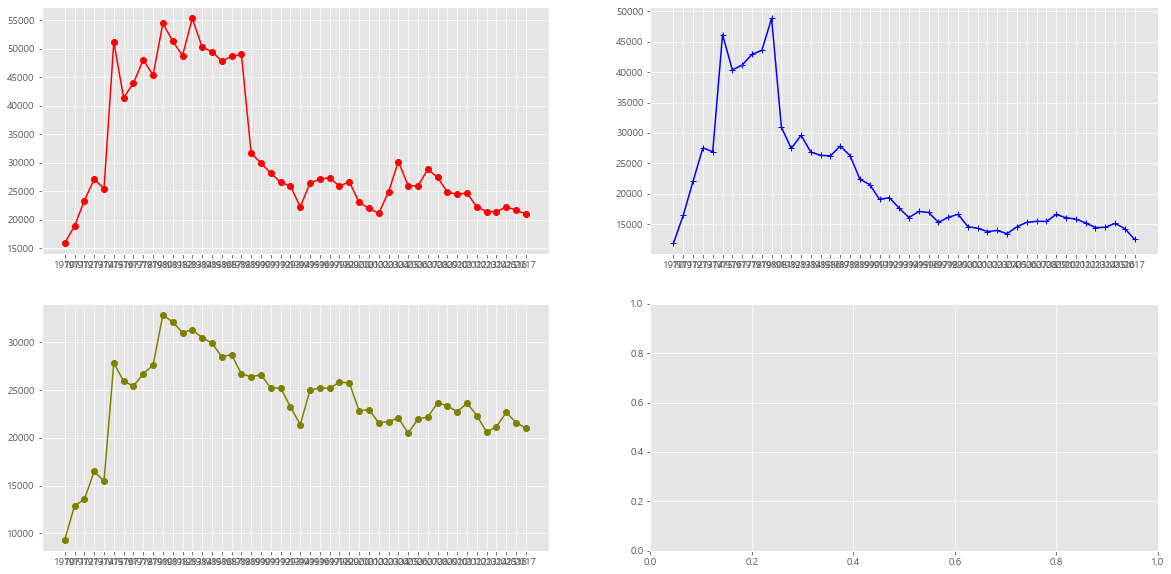

In [11]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.plot(col_years, df_4.loc["충청남도"],marker='o', color='red')
ax2.plot(col_years, df_4.loc["경상북도"],marker='+', color='b')
ax3.plot(col_years, df_4.loc["강원도"],marker='o', color='olive')
ax4.plot(col_years, df_4.loc["전라남도"],marker='+', color='black')

ax1.set_title("서울-> 충남", size =20)
ax2.set_title("서울-> 경북", size =20)
ax3.set_title("서울-> 강원", size =20)
ax4.set_title("서울-> 전남", size =20)

ax1.set_xlabel('기간')
ax1.set_ylabel('인구수')

plt.show()

In [12]:
df_4.index = df_4.index.map(int)

df_4.plot(kind='area', stacked=True, alpha=0.2, figsize(20,10))

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize-15)

plt.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-12-33612d47ccf7>, line 3)

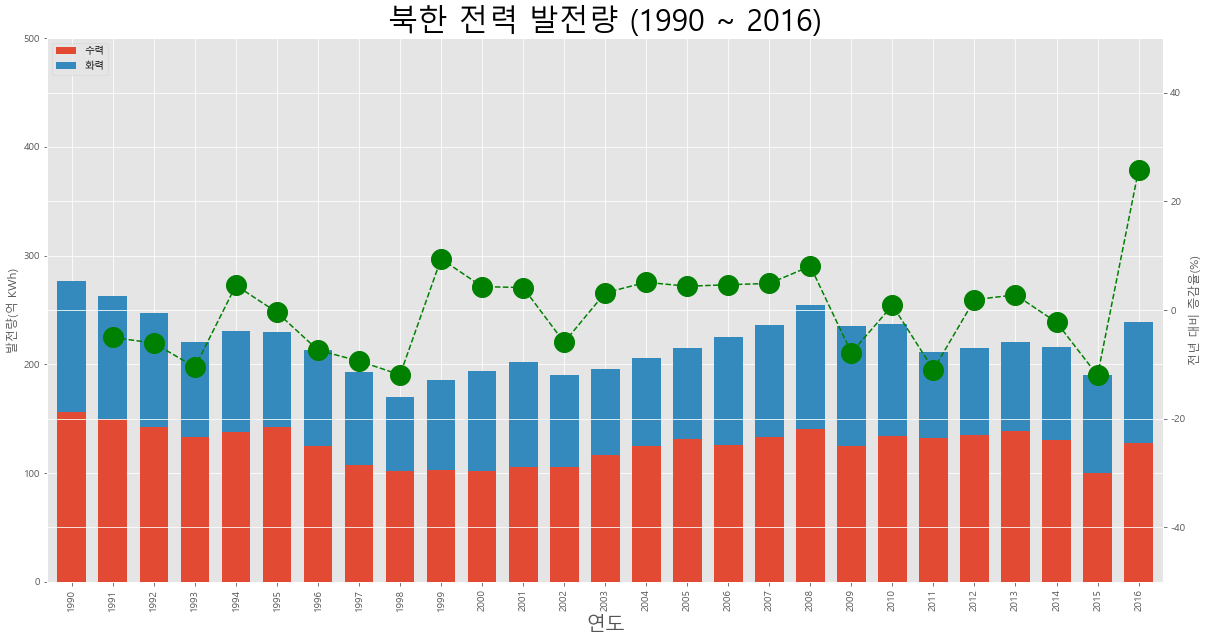

In [13]:
# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('./남북한발전전력량.xlsx', engine= 'openpyxl', convert_float=True)
df = df.loc[5:9]
df.drop('전력량 (억㎾h)', axis='columns', inplace=True)
df.set_index('발전 전력별', inplace=True)
df = df.T
# 증감율(변동률) 계산
df = df.rename(columns={'합계':'총발전량'})
df['총발전량 - 1년'] = df['총발전량'].shift(1)
df['증감율'] = ((df['총발전량'] / df['총발전량 - 1년']) - 1) * 100
# 2축 그래프 그리기
ax1 = df[['수력','화력']].plot(kind='bar', figsize=(20, 10), width=0.7, stacked=True)  
ax2 = ax1.twinx()
ax2.plot(df.index, df.증감율, ls='--', marker='o', markersize=20,  #ls = linestyle
         color='green', label='전년대비 증감율(%)')  
ax1.set_ylim(0, 500)
ax2.set_ylim(-50, 50)
ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('발전량(억 KWh)')
ax2.set_ylabel('전년 대비 증감율(%)')
plt.title('북한 전력 발전량 (1990 ~ 2016)', size=30)
ax1.legend(loc='upper left')

plt.show()

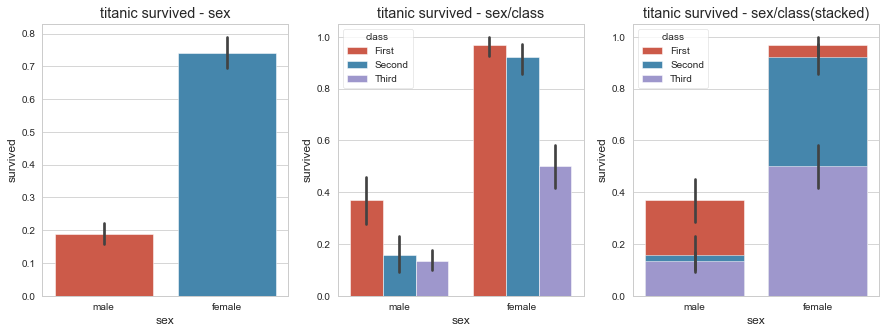

In [14]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns
 
# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')
 
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
 
# x축, y축에 변수 할당
sns.barplot(x='sex', y='survived', data=titanic, ax=ax1) 

# x축, y축에 변수 할당하고 hue 옵션 추가 
sns.barplot(x='sex', y='survived', hue='class', data=titanic, ax=ax2) 

# x축, y축에 변수 할당하고 hue 옵션을 추가하여 누적 출력
sns.barplot(x='sex', y='survived', hue='class', dodge=False, data=titanic, ax=ax3)       

# 차트 제목 표시
ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(stacked)')

plt.show()

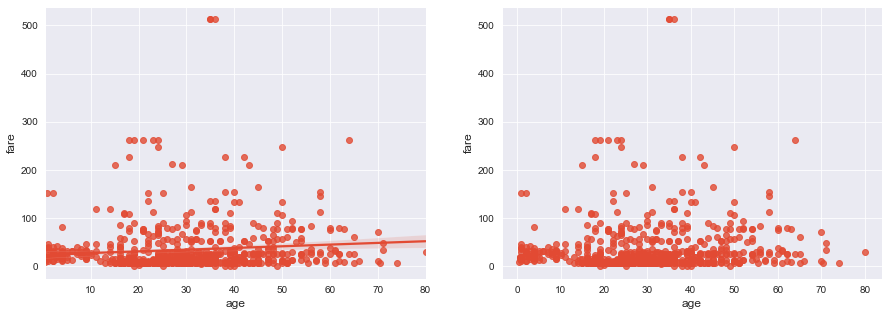

In [15]:
import seaborn as sns
 
# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')
 
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
 
# 그래프 그리기 - 선형회귀선 표시(fit_reg=True)
sns.regplot(x='age',        #x축 변수
            y='fare',       #y축 변수
            data=titanic,   #데이터
            ax=ax1)         #axe 객체 - 1번째 그래프 

# 그래프 그리기 - 선형회귀선 미표시(fit_reg=False)
sns.regplot(x='age',        #x축 변수
            y='fare',       #y축 변수
            data=titanic,   #데이터
            ax=ax2,         #axe 객체 - 2번째 그래프        
            fit_reg=False)  #회귀선 미표시

plt.show()

In [16]:
import folium

In [20]:
seoul_map = folium.Map(location=[37.55,126.98], zoom_start=12)
seoul_map.save("./seoul.html")
seoul_map

In [4]:
import pandas as pd
import seaborn as sns

iris = sns.load_dataset('iris')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


AttributeError: module 'matplotlib.pyplot' has no attribute 'lengend'

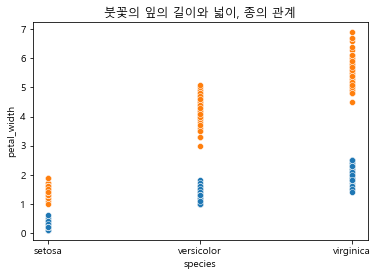

In [10]:
def scatter_graph(X, Y):
    sns.scatterplot(x=X, y=Y)
    
iris = sns.load_dataset('iris')
iris.set_index('species', inplace=True)

x_data = iris.index
y_data = iris["petal_width"]
scatter_graph(x_data, y_data)

y_data = iris["petal_length"]
scatter_graph(x_data, y_data)

plt.title("붓꽃의 잎의 길이와 넓이, 종의 관계")
labels = iris[["petal_width", "petal_length"]]
plt.lengend(labels)
plt.show()

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False